# The AR Model


## Listing 4-1. Describing a dataframe


In [2]:
import pandas as pd

# Import the dataframe
eq = pd.read_csv("Earthquake_database.csv")

# Describe the dataframe
eq.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


In [3]:
eq.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Listing 4-2. Profiling a dataframe


In [4]:
# Import the pandas profiling package
# from ydata_profiling import ProfileReport

# Get the pandas profiling report
# profile = ProfileReport(eq, title="Profiling Report")

# Show the profile report
# profile

## Listing 4-3. Convert the earthquake data to the yearly number of earthquake


<Axes: title={'center': 'Earthquakes Per Year'}, xlabel='year', ylabel='Number of Earthquakes'>

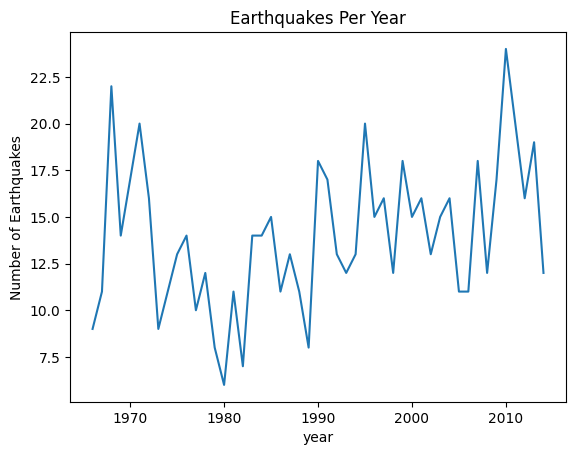

In [5]:
earthquakes_per_year = (
    eq.assign(
        year=pd.to_datetime(eq["Date"], format="mixed", utc=True).dt.year
    )  # Convert years to dates
    .query("Magnitude >= 7")  # Filter on earthquakes with magnitude of 7 or higher
    .groupby("year")[
        "Magnitude"
    ]  # Compute a count of earthquakes per year, Select one column to count
    .count()
    .iloc[1:-2]  # Remove erroneous values for year
)

earthquakes_per_year.plot(ylabel="Number of Earthquakes", title="Earthquakes Per Year")

## Listing 4-4. Convert the earthquake data to the yearly number of earthquake


<Axes: xlabel='year', ylabel='Number of Earthquakes'>

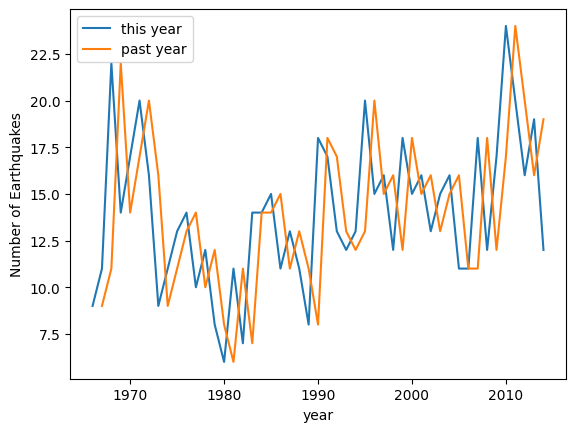

In [6]:
shifts = pd.DataFrame(
    {"this year": earthquakes_per_year, "past year": earthquakes_per_year.shift(1)}
)

shifts.plot(ylabel="Number of Earthquakes")

## Listing 4-5. Drop missing data


In [7]:
shifts = shifts.dropna()

## Listing 4-6. Compute a correlation matrix for the shifts dataframe


In [8]:
shifts.corr()

,this year,past year
this year,1.000000,0.313667
past year,0.313667,1.000000


## Listing 4-7. Augmented Dicky Fuller test


In [9]:
earthquakes_per_year = earthquakes_per_year.dropna()

In [10]:
from statsmodels.tsa.stattools import adfuller


def adf_test(timeseries):
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "ADF Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value

    return dfoutput

In [11]:
dfoutput = adf_test(earthquakes_per_year)

print("Results of Dickey-Fuller Test:")
print(dfoutput)

print(
    f"Time-Series is: {'stationary' if dfoutput['p-value'] < 0.05 else 'non-stationary'}"
)

Results of Dickey-Fuller Test:
ADF Statistic                  -5.008806
p-value                         0.000021
#Lags Used                      0.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64
Time-Series is: stationary


## Listing 4-8. Differencing in pandas


<Axes: xlabel='year', ylabel='Differenced number of Earthquakes'>

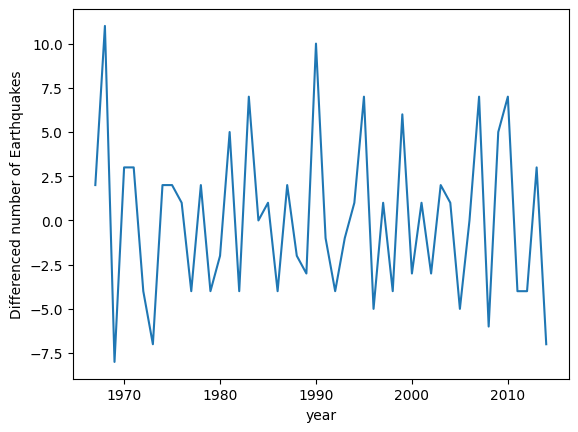

In [12]:
# Difference the data
differenced_data = earthquakes_per_year.diff().dropna()

# Plot the differenced data
differenced_data.plot(ylabel="Differenced number of Earthquakes")

## Listing 4-9. Autocorrelation of the differenced data


,this year,past year
this year,1.000000,-0.376859
past year,-0.376859,1.000000


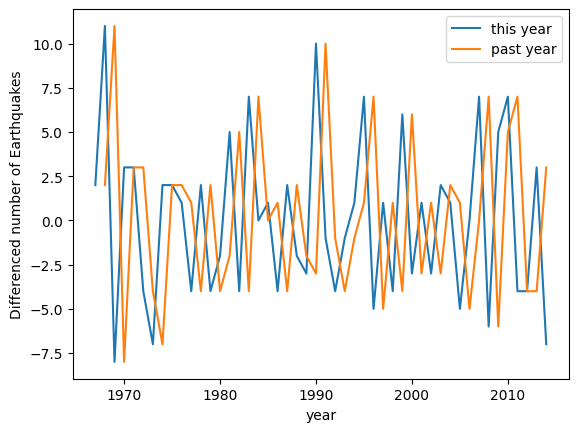

In [13]:
shifts_diff = pd.DataFrame(
    {"this year": differenced_data, "past year": differenced_data.shift(1)}
)

shifts_diff.plot(ylabel="Differenced number of Earthquakes")
shifts_diff.corr()

## Listing 4-10. Autocorrelation of the differenced data


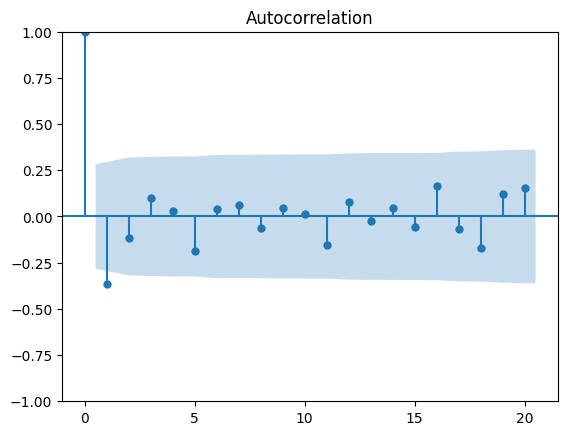

In [14]:
from statsmodels.graphics.tsaplots import plot_acf

_ = plot_acf(differenced_data, lags=20)

## Listing 4-11. Autocorrelation of the differenced data


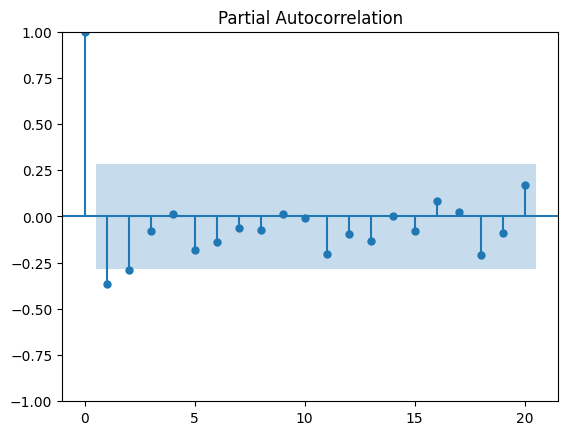

In [15]:
from statsmodels.graphics.tsaplots import plot_pacf

_ = plot_pacf(differenced_data, lags=20)

## Listing 4-12. Estimate Yule Walker AR coefficients with order 3


In [16]:
from statsmodels.regression.linear_model import yule_walker

coefficients, sigma = yule_walker(differenced_data, order=3)
print("coefficients: ", -coefficients)
print("sigma: ", sigma)

coefficients:  [0.51636104 0.34981679 0.08922855]
sigma:  3.99051873543974


## Listing 4-13. Make a Forecast with the AR coefficients


The -3 in the slice history[-3:] corresponds directly to the order of your autoregressive model. In time-series terms, an AR(3) model predicts the next value based on the 3 most recent observations.<br>
If your model has an order of $p$, you need the last $p$ values to calculate the next one.<br>

Why we reverse the slice: [::-1]<br>
Most Yule-Walker implementations return coefficients in the order $[\phi_1, \phi_2, \phi_3]$.<br>

- $\phi_1$ is multiplied by the most recent value ($t-1$).<br>
- $\phi_3$ is multiplied by the oldest value in the window ($t-3$).<br>

Since history[-3:] gives you values in chronological order [t-3, t-2, t-1], we reverse it to [t-1, t-2, t-3] so the math aligns perfectly with the coefficient list during the dot product.


<Axes: ylabel='Number of earthquakes'>

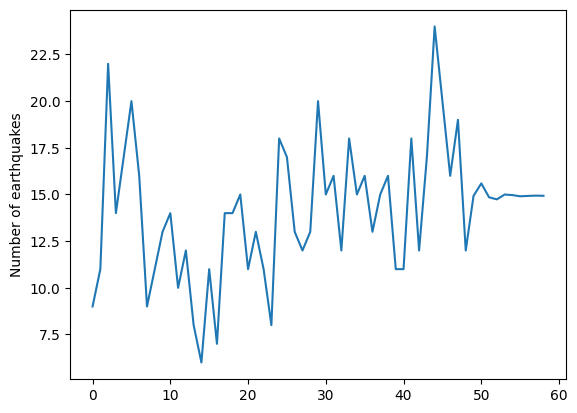

In [17]:
import numpy as np
import pandas as pd

order = 3
n_steps = 10

# Fit the model
coefficients, _ = yule_walker(differenced_data, order=order)

# Make a list of differenced values
history = differenced_data.tolist()

for _ in range(n_steps):
    # Calculate the next value using a dot product of the last 3 (order) values (reversed) and coefficients
    # coefficients contain 3 (order) values
    next_val = np.dot(coefficients, history[-order:][::-1])
    history.append(next_val)

# Undo differencing (Invert the transform)
# Concatenate the initial value with the predicted differences and use cumsum
initial_value = earthquakes_per_year.values[0]
forecasted_series = pd.Series([initial_value] + history).cumsum()

# Plot
forecasted_series.plot(ylabel="Number of earthquakes")

## Listing 4-14. Fit the model on a train set and evaluate it on a test set


Test R2: -0.0403


<Axes: xlabel='year', ylabel='Number of earthquakes'>

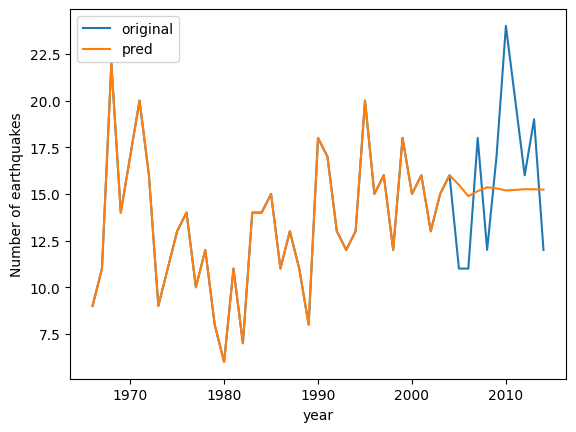

In [18]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import yule_walker
from sklearn.metrics import r2_score

# Setup
ORDER = 3
N_STEPS = 10

# 1. Data Splitting (Using differenced data for the fit)
train = differenced_data.iloc[:-N_STEPS]

# 2. Model Fitting
coeffs, sigma = yule_walker(train, order=ORDER)

# 3. Forecast logic
history = train.tolist()
for _ in range(N_STEPS):
    next_val = np.dot(coeffs, history[-ORDER:][::-1])
    history.append(next_val)

# 4. Inverse Transform (Undo Differencing)
initial_value = earthquakes_per_year.iloc[0]
full_pred_list = pd.Series([initial_value] + history).cumsum().values

# 5. Create the consolidated DataFrame
validation = pd.DataFrame(
    {"original": earthquakes_per_year.values, "pred": full_pred_list},
    index=earthquakes_per_year.index,
)

# 6. Evaluation using the DataFrame
test_set = validation.iloc[-N_STEPS:]
r2 = r2_score(test_set["original"], test_set["pred"])
print(f"Test R2: {r2:.4f}")

# 7. Visualization
validation.plot(ylabel="Number of earthquakes")

In [19]:
validation

,original,pred
year,,
1966,9,9.000000
1967,11,11.000000
1968,22,22.000000
1969,14,14.000000
1970,17,17.000000
1971,20,20.000000
1972,16,16.000000
1973,9,9.000000
1974,11,11.000000


## Listing 4-15. Apply a grid search to find the order that gives the best R2 score on the test data


In [20]:
def evaluate(order):
    train = list(differenced_data)[:-10]

    coefficients, sigma = yule_walker(train, order=order)

    # Make a list of differenced values
    val_list = list(train)
    # Reverse the list to corresponds with the order of coefs
    val_list.reverse()
    # Define the number of years to predict
    n_steps = 10

    # For each year to predict
    for i in range(n_steps):
        # Compute the new value
        new_val = 0
        for j in range(len(coefficients)):
            new_val += coefficients[j] * val_list[j]

        # Insert the new value at the beginning of the list
        val_list.insert(0, new_val)

    # Redo the reverse to have the order of time
    val_list.reverse()

    # Undo the differencing with a cumsum
    val_list = [list(earthquakes_per_year)[0]] + val_list
    new_val_list = pd.Series(val_list).cumsum()

    # Plot the newly obtained list
    validation = pd.DataFrame(
        {"original": earthquakes_per_year.reset_index(drop=True), "pred": new_val_list}
    )

    return r2_score(validation.iloc[-10:, 0], validation.iloc[-10:, 1])


# For each order between 1 and 30, fit and evaluate the model
orders = []
r2scores = []
for order in range(1, 31):
    orders.append(order)
    r2scores.append(evaluate(order))

# Create a results data frame
results = pd.DataFrame({"orders": orders, "scores": r2scores})

# Show the order with best R2 score
results[results["scores"] == results.max()["scores"]]

,orders,scores
18,19,0.133872


In [21]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import yule_walker
from sklearn.metrics import r2_score


def evaluate(order, data, full_series, n_steps=10):
    # Prepare Training Data
    train = data.iloc[:-n_steps].values
    coefficients, _ = yule_walker(train, order=order)

    history = list(train)  # Convert to list to allow appending

    for _ in range(n_steps):
        next_val = np.dot(coefficients, history[-order:][::-1])
        history.append(next_val)

    forecast = history[-n_steps:]  # Get only the forecasted values

    # Combine training values + forecasted values
    full_diff_pred = np.concatenate([train, forecast])

    # Reconstruct original scale: initial_value + cumsum
    predictions = np.cumsum(np.insert(full_diff_pred, 0, full_series.iloc[0]))

    # Consolidate into DataFrame
    validation = pd.DataFrame({"original": full_series.values, "pred": predictions})

    # Return R2 for the test period (last n_steps)
    test_set = validation.iloc[-n_steps:]
    return r2_score(test_set["original"], test_set["pred"])


# Use list comprehension for cleaner iteration
results = pd.DataFrame(
    {
        "order": range(1, 31),
        "score": [
            evaluate(o, differenced_data, earthquakes_per_year) for o in range(1, 31)
        ],
    }
)

# Identify the best model using idxmax()
best_model = results.loc[results["score"].idxmax()]
print(f"Best Order: {int(best_model['order'])} with R2: {best_model['score']:.4f}")

Best Order: 19 with R2: 0.1339


## Listing 4-16. Fit an AutoReg with MLflow logging


In [ ]:
from statsmodels.tsa.ar_model import AutoReg
import mlflow

# Start mlflow autologging
mlflow.autolog()

# Create the autoregression with order 19 and fit it
ar = AutoReg(list(earthquakes_per_year), 19, old_names=False)
res = ar.fit()

# Show the results
print(res.summary())

# End the previous run
mlflow.end_run()

2026/02/19 19:09:06 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2026/02/19 19:09:06 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2026/02/19 19:09:06 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '69392510e2f146b7890d0910706a3352', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current statsmodels workflow
2026/02/19 19:09:06 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   49
Model:                    AutoReg(19)   Log Likelihood                 -68.949
Method:               Conditional MLE   S.D. of innovations              2.409
Date:                Thu, 19 Feb 2026   AIC                            179.899
Time:                        19:09:15   BIC                            209.324
Sample:                            19   HQIC                           189.312
                                   49                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5853      5.626      1.526      0.127      -2.442      19.613
y.L1           0.3818      0.162      2.361      0.018       0.065       0.699
y.L2          -0.2733      0.161     -1.692      0.0

## Listing 4-17. Log a custom metric to MLflow


In [24]:
with mlflow.start_run():
    # Start mlflow autologging because you still want to log the model
    mlflow.autolog()

    # Create the autoregression with order 19 and fit it
    ar = AutoReg(list(earthquakes_per_year), 19, old_names=False)
    res = ar.fit()

    # Show the results
    print(res.summary())

    # Get the r2 score on the train set (as calculated in listing 4-15)
    r2_test = float(
        results[results["score"] == results.max()["score"]].iloc[0]["score"]
    )

    # Log this metric to mlflow
    mlflow.log_metric("r2_score_test", r2_test)

2026/02/19 19:11:04 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2026/02/19 19:11:04 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2026/02/19 19:11:04 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   49
Model:                    AutoReg(19)   Log Likelihood                 -68.949
Method:               Conditional MLE   S.D. of innovations              2.409
Date:                Thu, 19 Feb 2026   AIC                            179.899
Time:                        19:11:13   BIC                            209.324
Sample:                            19   HQIC                           189.312
                                   49                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5853      5.626      1.526      0.127      -2.442      19.613
y.L1           0.3818      0.162      2.361      0.018       0.065       0.699
y.L2          -0.2733      0.161     -1.692      0.0